In [1]:
# import Dependencies and Setup
%matplotlib inline
import gmaps
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import requests
import time
import requests
import json
import datetime
from config import api_key
# Google developer API key
from config import gkey
# Configure gmaps
import pprint 
from scipy.stats import linregress

In [2]:
#variables to append queried API data for each citiers for historical weather data
#capture list of PJM Cities from CSV files gathered from DB's
path = "Resources/AECO city.csv"
city_data = pd.read_csv(path)
cities = city_data['city_state']
humidity = []
wind_speed = []
city_name = []
precip = []
condition = []
avg_temp= []
date_new=[]
#gather weather 5 days historical weather data from World Weather API @ https://www.apixu.com/api.aspx 

#format for weather API request calls - http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
historic_url = "http://api.apixu.com/v1/history.json?"
forecast_url = "http://api.apixu.com/v1/forecast.json?"
current_url = "http://api.apixu.com/v1/current.json?"
units = "imperial"
#Build partial query URL
#historical request, dt should be in yyyy-MM-dd format after 1st Jan, 2015

historic_query_url = f"{historic_url}key={api_key}&q="
current_query_url = f"{current_url}key={api_key}&q="
response = requests.get(current_query_url).json()

#capture the dates for which we will read historical weather data (for each of the days upto 5 days prior)
hist_dates = []
for x in range(1, 6, 1):
    hist_dates.append(datetime.date.today() - datetime.timedelta(days=int(x)))
#print(hist_dates)

#capture past weather data for each cities serviced by the selected PNODE
print("Begining Data Retrieval") 
print("------------------------") 
for date in hist_dates:
    for city in cities:
        try:
            city_url = historic_query_url + city+"&dt="+str(date)
            print(city_url)
            response = requests.get(city_url).json()
            avg_temp.append(response['forecast']['forecastday'][0]['day']['avgtemp_f'])
            humidity.append(response['forecast']['forecastday'][0]['day']['avghumidity'])
            wind_speed.append(response['forecast']['forecastday'][0]['day']['maxwind_mph'])
            precip.append(response['forecast']['forecastday'][0]['day']['totalprecip_in'])
            condition.append(response['forecast']['forecastday'][0]['day']['condition']['text'])
            city_name.append(city)
            date_new.append(date)
            print(f"Retrieving Results for Index |{city} for date - {date}.")
        except (KeyError, IndexError, ConnectionResetError):
            print("Missing field/result... skipping.")   
print("--------------------------------------------------")
print("Data Retrieval Complete")

Begining Data Retrieval
------------------------
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-18
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=2018-11-18
Retrieving Results for Index |Allison Park,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Ambridge,PA&dt=2018-11-18
Retrieving Results for Index |Ambridge,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Baden,PA&dt=2018-11-18
Retrieving Results for Index |Baden,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Bairdford,PA&dt=2018-11-18
Retrieving Results for Index |Bairdford,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Bakerstown,PA&dt=2018-11-18
Retrieving Results

Retrieving Results for Index |West Mifflin,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-18
Retrieving Results for Index |Wildwood,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&dt=2018-11-18
Retrieving Results for Index |Wilmerding,PA for date - 2018-11-18.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-17
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=2018-11-17
Retrieving Results for Index |Allison Park,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Ambridge,PA&dt=2018-11-17
Retrieving Results for Index |Ambridge,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Baden,PA&dt=2018-1

Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-17
Retrieving Results for Index |Verona,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Mifflin,PA&dt=2018-11-17
Retrieving Results for Index |West Mifflin,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-17
Retrieving Results for Index |Wildwood,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&dt=2018-11-17
Retrieving Results for Index |Wilmerding,PA for date - 2018-11-17.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Aliquippa,PA&dt=2018-11-16
Retrieving Results for Index |Aliquippa,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Allison Park,PA&dt=201

Retrieving Results for Index |South Heights,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-16
Retrieving Results for Index |Springdale,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle Creek,PA&dt=2018-11-16
Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-16
Retrieving Results for Index |Verona,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Mifflin,PA&dt=2018-11-16
Retrieving Results for Index |West Mifflin,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wildwood,PA&dt=2018-11-16
Retrieving Results for Index |Wildwood,PA for date - 2018-11-16.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Wilmerding,PA&d

Retrieving Results for Index |Sewickley,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Shippingport,PA&dt=2018-11-15
Retrieving Results for Index |Shippingport,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=South Heights,PA&dt=2018-11-15
Retrieving Results for Index |South Heights,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-15
Retrieving Results for Index |Springdale,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle Creek,PA&dt=2018-11-15
Retrieving Results for Index |Turtle Creek,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Verona,PA&dt=2018-11-15
Retrieving Results for Index |Verona,PA for date - 2018-11-15.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=West Miff

Retrieving Results for Index |Rochester,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Russellton,PA&dt=2018-11-14
Retrieving Results for Index |Russellton,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Sewickley,PA&dt=2018-11-14
Retrieving Results for Index |Sewickley,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Shippingport,PA&dt=2018-11-14
Retrieving Results for Index |Shippingport,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=South Heights,PA&dt=2018-11-14
Retrieving Results for Index |South Heights,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Springdale,PA&dt=2018-11-14
Retrieving Results for Index |Springdale,PA for date - 2018-11-14.
http://api.apixu.com/v1/history.json?key=93aaea525631406193a12731181411&q=Turtle 

In [3]:
#create data frame
hweather_dict = {
    "City/State":city_name,
    "Temp":avg_temp,
    "Humidity":humidity,
    "Precipitation":precip,
    "Wind Speed":wind_speed,
    "Weather Condition":condition,
    "Date":date_new    
}
hweather_dict = pd.DataFrame(hweather_dict)
hweather_dict.to_csv(
    "Resources/WeatherData.csv", encoding="utf-8", index=False)
hweather_dict.head()

,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition,Date
0,"Aliquippa,PA",33.3,90.0,0.14,4.7,Light drizzle,2018-11-18
1,"Allison Park,PA",32.8,91.0,0.07,3.8,Patchy rain possible,2018-11-18
2,"Ambridge,PA",33.3,90.0,0.14,4.7,Light drizzle,2018-11-18
3,"Baden,PA",33.3,90.0,0.14,4.7,Light drizzle,2018-11-18
4,"Bairdford,PA",33.3,90.0,0.15,4.9,Patchy rain possible,2018-11-18


In [4]:
#capture forecast data for each cities serviced by the selected PNODE
temp_forecast = []
humidity_forecast = []
wind_speed_forecast = []
city_name_forecast = []
precip_forecast = []
condition_forecast = []

#http://api.apixu.com/v1/search.json?key=<YOUR_API_KEY>&q=lond
forecast_url = "http://api.apixu.com/v1/forecast.json?"

city_fc_url = f"http://api.apixu.com/v1/forecast.json?key={api_key}&q="
fcast_date = datetime.date.today() + datetime.timedelta(days=1)

print("Begining Data Retrieval") 
print("---------------------------------------------------") 

for city in cities:
    try:
        fcast_url = city_fc_url+city+"&days=str(fcast_date)"
        fresponse = requests.get(fcast_url).json()
        temp_forecast.append(fresponse['forecast']['forecastday'][0]['day']['avgtemp_f'])
        humidity_forecast.append(fresponse['forecast']['forecastday'][0]['day']['avghumidity'])
        wind_speed_forecast.append(fresponse['forecast']['forecastday'][0]['day']['maxwind_mph'])
        precip_forecast.append(fresponse['forecast']['forecastday'][0]['day']['totalprecip_in'])
        condition_forecast.append(fresponse['forecast']['forecastday'][0]['day']['condition']['text'])
        city_name_forecast.append(fresponse['location']['name'])
        print(f"Retrieving Results for Index |{city} for next day - {fcast_date}.")

    except (KeyError, IndexError, ConnectionResetError):
        print("Missing field/result... skipping.")

        
print("--------------------------------------------------")
print("Data Retrieval Complete")

Begining Data Retrieval
---------------------------------------------------
Retrieving Results for Index |Aliquippa,PA for next day - 2018-11-20.
Retrieving Results for Index |Allison Park,PA for next day - 2018-11-20.
Retrieving Results for Index |Ambridge,PA for next day - 2018-11-20.
Retrieving Results for Index |Baden,PA for next day - 2018-11-20.
Retrieving Results for Index |Bairdford,PA for next day - 2018-11-20.
Retrieving Results for Index |Bakerstown,PA for next day - 2018-11-20.
Retrieving Results for Index |Beaver,PA for next day - 2018-11-20.
Retrieving Results for Index |Braddock,PA for next day - 2018-11-20.
Retrieving Results for Index |Carnegie,PA for next day - 2018-11-20.
Retrieving Results for Index |Cheswick,PA for next day - 2018-11-20.
Retrieving Results for Index |Clinton,PA for next day - 2018-11-20.
Retrieving Results for Index |Conway,PA for next day - 2018-11-20.
Retrieving Results for Index |Coraopolis,PA for next day - 2018-11-20.
Retrieving Results for In

In [5]:
#create data frame

fcast_weather_dict = {
    "City/State":city_name_forecast,
    "Temp":temp_forecast,
    "Humidity":humidity_forecast,
    "Precipitation":precip_forecast,
    "Wind Speed":wind_speed_forecast,
    "Weather Condition":condition_forecast
    
}
fcast_weather_data = pd.DataFrame(fcast_weather_dict)
fcast_weather_data.to_csv(
    "Resources/ForecastWeatherData.csv", encoding="utf-8", index=False)
fcast_weather_data["pnode"]="DUQ"
fcast_weather_data.head()

,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition,pnode
0,Aliquippa,32.6,94.0,0.45,4.0,Light rain,DUQ
1,Allison Park,32.8,93.0,0.20,3.6,Light rain,DUQ
2,Ambridge,32.6,94.0,0.45,4.0,Light rain,DUQ
3,Baden,32.6,94.0,0.45,4.0,Light rain,DUQ
4,Bairdford,31.7,91.0,0.80,5.6,Light rain,DUQ


In [6]:
path = 'Resources/DUQ Regression.csv'
regress_data = pd.read_csv(path)
regress_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN
1,DUQ,1:00,33.0,-0.086,-0.08,1.66,NaN
2,DUQ,2:00,32.4,-0.086,-0.08,1.66,NaN
3,DUQ,3:00,32.9,-0.086,-0.08,1.66,NaN
4,DUQ,4:00,34.5,-0.086,-0.08,1.66,NaN


In [7]:
#merge the weather data with regression weights to determine the forecasted price
merged_data = pd.merge(regress_data,fcast_weather_data, how='outer', on='pnode')
merged_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Aliquippa,32.6,94.0,0.45,4.0,Light rain
1,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Allison Park,32.8,93.0,0.20,3.6,Light rain
2,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Ambridge,32.6,94.0,0.45,4.0,Light rain
3,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Baden,32.6,94.0,0.45,4.0,Light rain
4,DUQ,0:00,39.7,-0.086,-0.08,1.66,NaN,Bairdford,31.7,91.0,0.80,5.6,Light rain


In [8]:
#calculate forecasted price based on the weights assigned to the weather variables (Temp, humidity, precepitation)
merged_data['forecast_rt_lmp']=merged_data['intercept']+merged_data['Avg_Temp_wt']*merged_data['Temp']+merged_data['Avg_Hum_wt']*merged_data['Humidity']+merged_data['Avg_prec_wt']*merged_data['Precipitation']
                                           
merged_data.head()

,pnode,Time,intercept,Avg_Temp_wt,Avg_Hum_wt,Avg_prec_wt,forecast_rt_lmp,City/State,Temp,Humidity,Precipitation,Wind Speed,Weather Condition
0,DUQ,0:00,39.7,-0.086,-0.08,1.66,30.1234,Aliquippa,32.6,94.0,0.45,4.0,Light rain
1,DUQ,0:00,39.7,-0.086,-0.08,1.66,29.7712,Allison Park,32.8,93.0,0.20,3.6,Light rain
2,DUQ,0:00,39.7,-0.086,-0.08,1.66,30.1234,Ambridge,32.6,94.0,0.45,4.0,Light rain
3,DUQ,0:00,39.7,-0.086,-0.08,1.66,30.1234,Baden,32.6,94.0,0.45,4.0,Light rain
4,DUQ,0:00,39.7,-0.086,-0.08,1.66,31.0218,Bairdford,31.7,91.0,0.80,5.6,Light rain


In [10]:
#read combined data CSV for weather, load & price data to determine correlation with price
combined_data = pd.read_csv('Resources/DUQ All Data1.csv')
combined_data.head()

,datetime_beginning_ept,time,pnode_name,total_lmp_rt,load,Average of Temp,Average of Humidity,Average of Precipitation
0,43409,0,DUQ,19.561206,1216.000000,55.978431,80.078431,0.139608
1,43409,1,DUQ,19.619078,1185.800000,55.978431,80.078431,0.139608
2,43409,2,DUQ,19.795198,1176.200000,55.978431,80.078431,0.139608
3,43409,3,DUQ,20.247282,1176.400000,55.978431,80.078431,0.139608
4,43409,4,DUQ,20.736460,1208.666667,55.978431,80.078431,0.139608


In [ ]:
# # Set line
# x_axis = combined_data['total_lmp_rt']

# (slope, intercept, _, _, _) = linregress(x_axis, combined_data['load'])
# fit = slope * x_axis + intercept
# fig, ax = plt.subplots()

# fig.suptitle("Load VS Price", fontsize=16, fontweight="bold")

# # ax.set_xlim(0, 10)
# # ax.set_ylim(0, 10)

# ax.set_xlabel("Price(in $)")
# ax.set_ylabel("Load (in Megga Watts)")

# ax.plot(x_axis, combined_data['load'], linewidth=0, marker='o')
# ax.plot(x_axis, fit, 'b--')


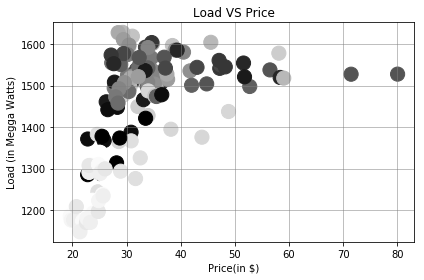

In [11]:
# Create a legend
# plot correlation between load and price
combined_data.plot.scatter('total_lmp_rt', 'load', s=200, c=combined_data['time'])

plt.title("Load VS Price")
plt.xlabel("Price(in $)")
plt.ylabel("Load (in Megga Watts)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.tight_layout()
# Save Figure
plt.savefig("Images/loadvsPrice.png")
plt.show()

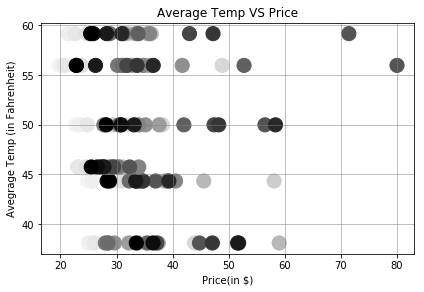

In [12]:
# load_price
# plot correlation between temperature and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Temp', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Temp VS Price")
plt.ylabel("Avegrage Temp (in Fahrenheit)")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.savefig("Images/AvgTempvsPrice.png")
#combined_data.plot.scatter('total_lmp_rt', 'load', c=combined_data['time'])
plt.show()

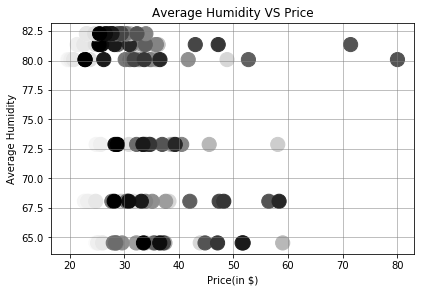

In [13]:
# plot correlation between humidity and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Humidity', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Humidity VS Price")
plt.ylabel("Average Humidity")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.savefig("Images/AvgHumidityvsPrice.png")
plt.show()

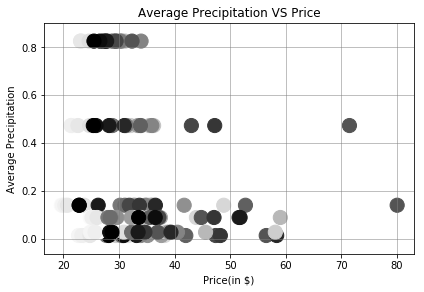

In [14]:
# plot correlation between percipitation and price
combined_data.plot.scatter('total_lmp_rt', 'Average of Precipitation', s=200, c=combined_data['time'])
plt.tight_layout()
plt.title("Average Precipitation VS Price")
plt.ylabel("Average Precipitation")
plt.xlabel("Price(in $)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.text(2000, 2000, textstr, fontsize=14)
# Save Figure
plt.figsize=(100,150)
plt.savefig("Images/AvgPrecipvsPrice.png")
plt.show()

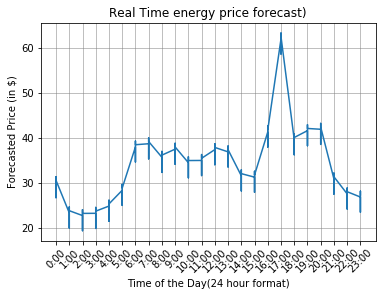

In [15]:

plt.plot(merged_data['Time'],merged_data['forecast_rt_lmp'])
# Create a legend
# Incorporate the other graph properties
plt.title("Real Time energy price forecast)")
plt.ylabel("Forecasted Price (in $)")
plt.xlabel("Time of the Day(24 hour format)")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.figure(figsize=(50,30))
_ = plt.xticks(rotation=45)
plt.savefig("Images/FcastPrice.png")
plt.show()

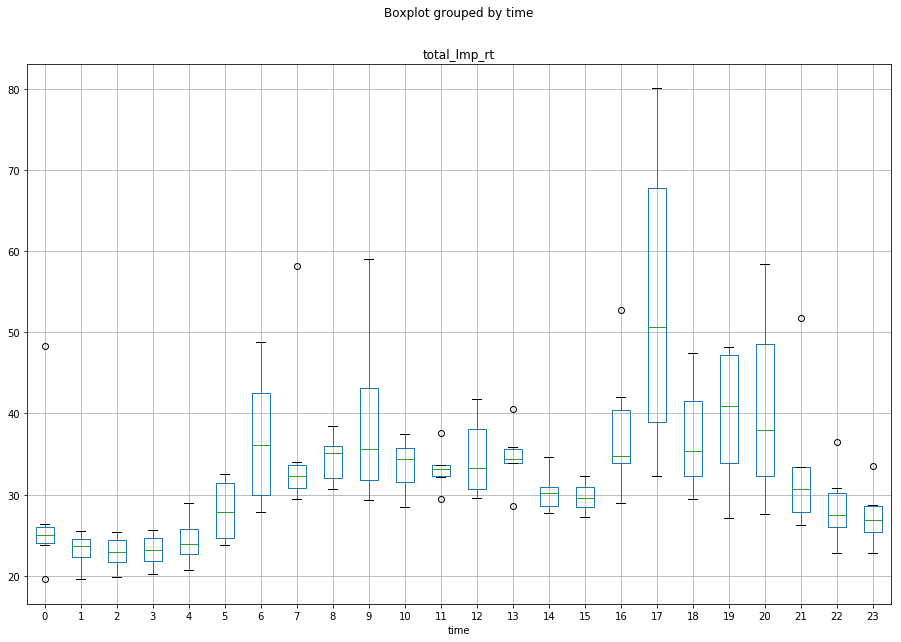

In [16]:
# box plot for showing the forecasted price
#plt.boxplot(combined_data['total_lmp_rt'])
combined_data.boxplot('total_lmp_rt', by='time', figsize=(15, 10))
plt.savefig("Images/FcastPrice_BoxPlot.png")
plt.show()

In [17]:
city_combined_data = combined_data
city_combined_data['City/State'] = merged_data['City/State']
cities_list = city_combined_data['City/State']
lat = []
lng = []
# Build the endpoint URL

for city in cities_list:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
    lng.append(geo_data["results"][0]["geometry"]["location"]["lng"])


In [18]:
# Create a load to price by location Heatmap layer
city_combined_data["lat"] = lat
city_combined_data["lng"] = lng
loads = city_combined_data['load'].astype(float)
locations = city_combined_data[['lat', 'lng']].astype(float)
city_combined_data.head()

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=loads,
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))